In [160]:
import os
import pyrugga as pgr
import pandas as pd 

## Parameters

Provide the location of the SuperScout files you wish to convert and the name of the CSV file you want to output

In [161]:
# the path to a folder of Superscout XML files
FOLDER = '../../datalake/Rugby/pro14/'

# The name of the output file
OUTPUT = 'Pro-14.csv'

# Functions

A collection of functions we are going to need down the line. **You can skip this section and jump to the main section**

In [162]:
# define our zones to count events in
def Zones( x ): 
    x = 10 * round( x / 10) 
    if x > 95:
        x = 95
    if x < 5:
        x = 5
    return x

# scans a folder and returns a list of all the XML files we want to convert
def scan_files(path):
    files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    xml_files = []
    for f in files:
        if '.xml' in f.lower() :
            xml_files.append(f)

    return xml_files

# opens each XML file and converts it to a Match object in PyRugga
def get_matches(FILES_LOC):
    matches = []
    for fn in scan_files(FILES_LOC):
        #print(FILES_LOC + fn)
        matches.append(pgr.Match(FILES_LOC + fn,zones=Zones))


    #Check stats
    dates = []
    for match in matches:
        dates.append(match.summary['fixture_date'][0])

    print("Number of Matches : %s" % str(len(matches)))
    print("First game : " + str(pd.to_datetime(pd.DataFrame(dates,columns=['dte'])['dte']).min()))
    print("Last game : " + str(pd.to_datetime(pd.DataFrame(dates,columns=['dte'])['dte']).max()))
    
    return matches

# list of the datapoints we want to include in our CSV
# note some of these fields have missleading names as they dont count team events rather player activity 
features = [
 'fixture_code',
 'period',
 'set_num',
 'team_name',
 'points',
 'x_coord',
 'x_coord_end',
 'y_coord',
 'y_coord_end',
 'meters_gained',
 'dist_traveled',
 'start',
 'length',
 'start_event',
 'end_event',
 'phases',
 'carry',
 'collection',
 'other_carry',
 'kick_return',
 'one_out_drive',
 'defender_beaten',
 'defensive_catch',
 'defensive_loose_ball',
 'attacking_loose_ball',
 'support_carry',
 'pick_and_go',
 'stepped',
 'dropped_ball_unforced',
 'initial_break',
 'restart_catch',
 'restart_return',
 'supported_break',
 'kick',
 'goal_kick',
 'box',
 'territorial',
 'bomb',
 'touch_kick',
 'lineout',
 'lineout_take',
 'throw_middle',
 'lineout_win_middle',
 'lineout_win_front',
 'lineout_throw',
 'maul',
 'ruck',
 'pass',
 'complete_pass',
 'offload',
 'scrum_half_pass',
 'break_pass',
 'incomplete_pass',
 'penalty_conceded',
 'penalty_won',
 'scrum', # scrumhalf nots scrums 
 'defensive_scrum',  # props nots scrums 
 'offensive_scrum', # props nots scrums 
 'no_8_pick_up',
 'no_8_pass',
 'tackle',
 'missed_tackle',
 'line_tackle',
 'chase_tackle',
 'other_tackle',
 'cover_tackle',
 'guard_tackle',
 'bumped_off',
 'jackal',
 'turnover_won',
 'try',
 'conversion',
 'advantage',
 'low',
 'tap_back',
 'edge_tackle',
 'positional',
 'throw_front',
 'attacking_catch',
 'carried_in_touch',
 'penalty_kick',
 'scrum_half_kick',
 'start_set_lineout_steal',
 'tap_pen',
 'lost_ball_forced',
 'lost_in_ruck_or_maul',
 'restart_22m',
 'cross_pitch',
 'in_goal_touchdown',
 'lineout_steal_front',
 'penalty_goal',
 'try_pass',
 'chip',
 'free_kick',
 'interception',
 'lineout_win_15m_plus',
 'lineout_win_quick',
 'not_releasing',
 'obstruction',
 'start_period',
 'throw_15m_plus',
 'throw_back',
 'throw_quick',
 'accidental_offside',
 'bad_pass',
 'charge_down',
 'failure_to_find_touch',
 'forward_pass',
 'foul_play_high_tackle',
 'foul_play_other',
 'foul_play',
 'hands_in_ruck',
 'intercepted_pass',
 'kick_error',
 'lineout_steal_middle',
 'lineout_win_back',
 'mark',
 'not_rolling_away',
 'offside_at_kick',
 'outpaced',
 'scrum_offence', 
 'video_ref_awarded',
 'won_penalty_try',
 'yellow_card',
 'red_card',
 'clean_break',
 'collected_bounce',
 'end_set_kick_error',
 'error',
 'error_out_of_play',
 'error_terratorial_loss',
 'forced_in_touch',
 'goal_success',
 'goal_missed',
 'in_goal',
 'ineffective',
 'kick_in_touch_bounce',
 'lost_overthrown',
 'off_load',
 'pen_conceded',
 'penalty_try',
 'pressure_error',
 'pressure_in_touch',
 'reset',
 'sack',
 'tackled_dominant',
 'tackled_ineffective',
 'tackled_neutral',
 'to_ground',
 'loose_head_offensive',
 'hooker_offensive',
 'tight_head_offensive',
 'lock_4_offensive',
 'lock_5_offensive',
 'flanker_6_offensive',
 'flanker_7_offensive',
 'number_8_offensive',
 'scrum_half_offensive',
 'fly_half_offensive',
 'left_wing_offensive',
 'inside_centre_offensive',
 'outside_centre_offensive',
 'right_wing_offensive',
 'full_back_offensive',
 'loose_head_defensive',
 'hooker_defensive',
 'tight_head_defensive',
 'lock_4_defensive',
 'lock_5_defensive',
 'flanker_6_defensive',
 'flanker_7_defensive',
 'number_8_defensive',
 'scrum_half_defensive',
 'fly_half_defensive',
 'left_wing_defensive',
 'inside_centre_defensive',
 'outside_centre_defensive',
 'right_wing_defensive',
 'full_back_defensive']

# Main

In [163]:
# creates an empty dataframe
df = pd.DataFrame()

# Convert to Match Object
matches = get_matches(FOLDER)
    
for match in matches:
    match.timeline['x_coord'] = (match.timeline['x_coord']*1.0).apply(match._Zones)
    match.timeline['y_coord'] = (match.timeline['y_coord']*1.0).apply(match._Zones)

    match.timeline['x_coord_end'] = (match.timeline['x_coord_end']*1.0).apply(match._Zones)
    match.timeline['y_coord_end'] = (match.timeline['y_coord_end']*1.0).apply(match._Zones)

    match.timeline['fixture_code'] = match.summary.fixture_code[0]

    df = pd.concat([df, match.timeline[features]], sort=False)

# Prints the first 10 rows
df.head(10)

Number of Matches : 172
First game : 2018-02-11 00:00:00
Last game : 2020-06-03 00:00:00


,fixture_code,period,set_num,team_name,points,x_coord,x_coord_end,y_coord,y_coord_end,meters_gained,...,flanker_6_defensive,flanker_7_defensive,number_8_defensive,scrum_half_defensive,fly_half_defensive,left_wing_defensive,inside_centre_defensive,outside_centre_defensive,right_wing_defensive,full_back_defensive
0,419134,1,1,Dragons,0,20,50,10,10,21,...,0,0,0,0,0,0,1,0,1,0
1,419134,1,2,Scarlets,3,50,70,60,30,14,...,0,1,2,1,0,0,1,0,0,0
2,419134,1,3,Scarlets,0,30,60,50,70,27,...,0,0,0,0,0,0,0,0,0,0
3,419134,1,4,Dragons,0,40,50,5,20,11,...,0,0,0,1,0,0,0,0,0,0
4,419134,1,5,Scarlets,0,20,70,40,30,51,...,2,1,2,0,2,0,1,0,0,1
5,419134,1,6,Dragons,0,20,20,40,40,-3,...,0,0,0,0,0,0,0,0,0,0
6,419134,1,7,Dragons,-3,30,30,40,40,1,...,0,0,0,0,0,0,0,0,0,0
7,419134,1,8,Scarlets,0,30,60,50,50,27,...,0,0,0,0,0,0,0,0,0,0
8,419134,1,9,Dragons,0,40,70,20,20,27,...,0,0,0,0,0,0,0,0,0,0
9,419134,1,10,Scarlets,0,30,30,50,5,-2,...,1,0,0,0,0,1,0,0,0,1


In [164]:
# output to CSV
df.to_csv(OUTPUT,index=False)

In [165]:
#output to database
from sqlalchemy import create_engine

#Postgres in our environment 

engine_remote = create_engine('postgresql://postgres@postgres:5432/postgres')

df.to_sql('timelines',engine_remote,index=False,if_exists='replace')

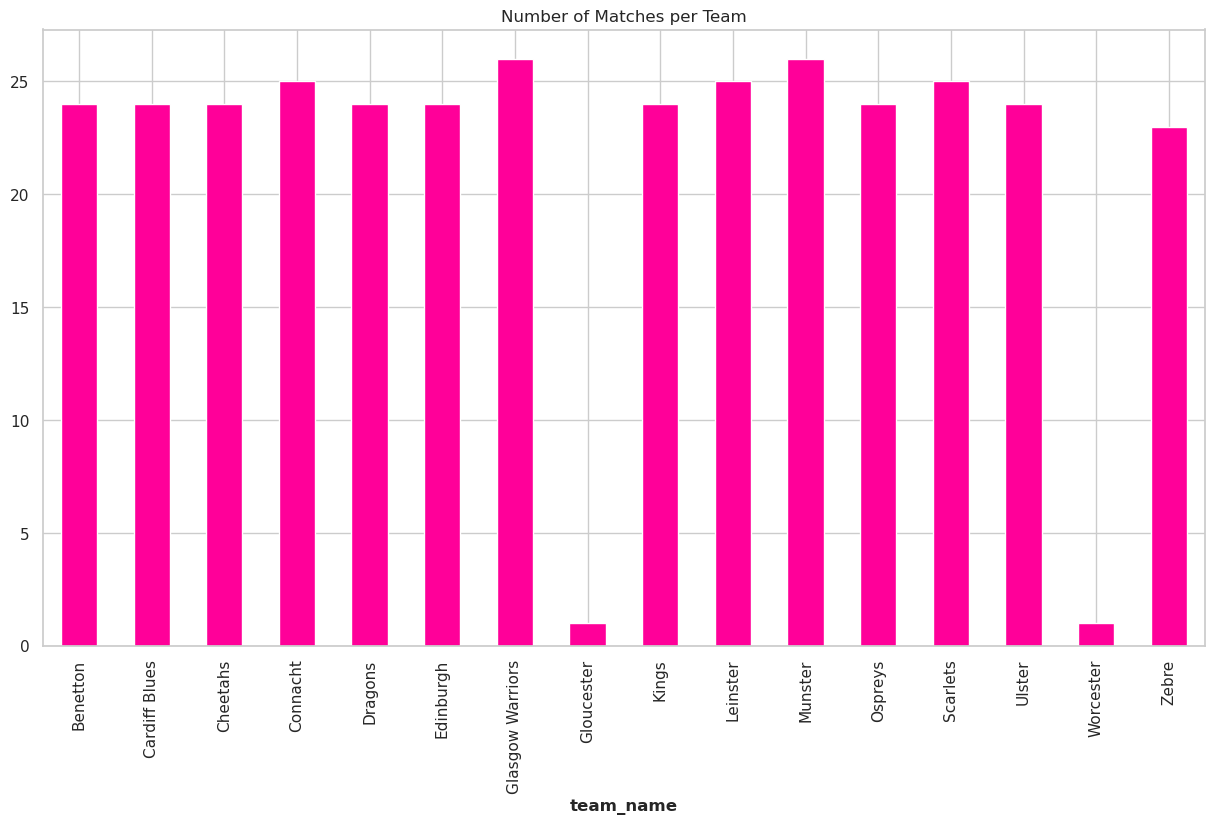

In [166]:
df.groupby('team_name')['fixture_code'].nunique().plot.bar(title='Number of Matches per Team')

## Playing Around

So why do we want to convert the XML to CSV? Well its helpful when it comes to fitting a statistical model. For example what is the best appraoch to scoring off a lineout close to the line  

In [167]:
import numpy as np
from statsmodels.formula.api import ols

Why we care about scoring from a lineout well because it's where 35% of points are scored

In [ ]:
df['abs_points'] = df['points'].abs()
df2 = df.groupby(['team_name','start_event']).sum().reset_index()

In [169]:
(df2.groupby('start_event')['abs_points'].sum()/df2['abs_points'].sum()).sort_values(ascending=False)

start_event
Lineout                           0.493591
Scrum                             0.167265
Turnover Won                      0.131120
Kick Return                       0.118175
50m Restart                       0.027685
Tap Pen                           0.024481
Start Set Lineout Steal           0.017431
Free Kick                         0.006280
Start Set 50m Restart Retained    0.005383
Start Set Scrum Steal             0.003589
22m Restart                       0.002820
Start Set 22m Restart Retained    0.002179
Name: abs_points, dtype: float64

Just select those plays where we have won a lineout for 20 out

In [170]:
df2 = df.query("x_coord >= 80")\
        .query('start_event == "Lineout"')\
df2['passes'] = df2['pass']

In [171]:
res = ols(formula="""
points ~  
+throw_front
+maul
+scrum_half_pass
+carry:(one_out_drive+pick_and_go+passes)
+cross_pitch
+advantage
+one_out_drive
+pick_and_go

""", data=df2).fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.136    
Dependent Variable:   points           AIC:                6658.1210
Date:                 2020-08-24 16:53 BIC:                6715.6890
No. Observations:     1385             Log-Likelihood:     -3318.1  
Df Model:             10               F-statistic:        22.87    
Df Residuals:         1374             Prob (F-statistic): 4.67e-40 
R-squared:            0.143            Scale:              7.1101   
--------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            2.2755   0.1623  14.0222 0.0000  1.9571  2.5938
throw_front         -2.2444   0.2007 -11.1846 0.0000 -2.6380 -1.8507
maul                 0.2756   0.1612   1.7102 0.0874 -0.0405  0.5918
scrum_half_pass     -0.4405   0.0561  -7.8538 0.0000 -0.5505 -0.3305
carry:one_out_drive  0.0192   0.0056   3.4328 0.0006  0.0082  0.0301
carry:pick_and_go   -0.0264   0.0065  -4.0946 0.0000 -0.0391 -0.0138
carry:passes        -0.0016   0.0022  -0.7102 0.4777 -0.0058  0.0027
cross_pitch          0.0553   0.3965   0.1394 0.8891 -0.7225  0.8330
advantage           -0.1571   0.1577  -0.9960 0.3194 -0.4666  0.1523
one_out_drive       -0.2879   0.0616  -4.6702 0.0000 -0.4088 -0.1670
pick_and_go          0.4817   0.0859   5.6075 0.0000  0.3132  0.6502
--------------------------------------------------------------------
Omnibus:               278.519       Durbin-Watson:          2.035  
Prob(Omnibus):         0.000         Jarque-Bera (JB):       154.129
Skew:                  0.680         Prob(JB):               0.000  
Kurtosis:              2.093         Condition No.:          582    
====================================================================

"""

Ok so an aweful model but directionally is ok so our rules are:

* don't throw to the front,
* setup a maul,
* if your maul collapses pick and go,
* if you get an advantage cross kick (it wont work but that is not the point you are better of resetting and going again from a scrum (not in the model take my word for it) or another lineout

So who is good playing the odds? 

In [174]:
df2['lineout_score'] = res.predict(df2)

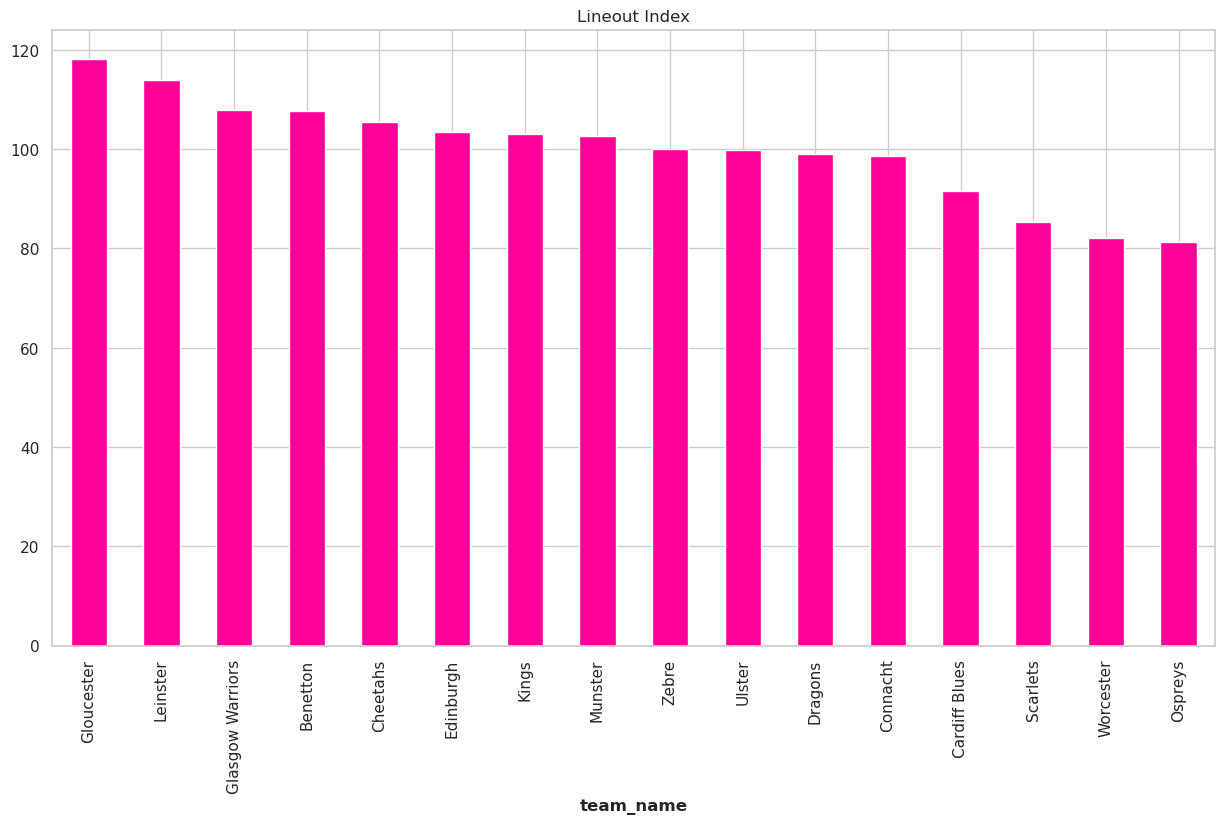

In [180]:
(df2.groupby('team_name')['lineout_score'].mean()/np.mean(df2.groupby('team_name')['lineout_score'].mean())*100)\
.sort_values(ascending=False).plot.bar(title='Lineout Index')

In [176]:
(df2.groupby('team_name')['lineout_score'].mean()/np.mean(df2.groupby('team_name')['lineout_score'].mean())*100)\
.sort_values(ascending=False)

team_name
Gloucester          118.202271
Leinster            113.901362
Glasgow Warriors    107.837361
Benetton            107.651339
Cheetahs            105.406416
Edinburgh           103.480349
Kings               103.151060
Munster             102.556280
Zebre               100.058022
Ulster               99.759729
Dragons              98.947436
Connacht             98.680349
Cardiff Blues        91.535822
Scarlets             85.394954
Worcester            82.165568
Ospreys              81.271684
Name: lineout_score, dtype: float64

Ok I left in Gloucester & Worcester by mistake so ignore them butLeinster are 39% better at following the rules than Ospreys. In fact all the Walesh teams pretty poor at following the rules, weird. Either they dont know what they are doing or know something we do not. More likely the latter. 


In [177]:
113/81

1.3950617283950617